# Descrição do problema

Usuários da eNB1 se afastam da mesma em linha reta e com um ângulo aleatório, enquanto realizam o download de um vídeo de 15 MB. Eventualmente, devido ao enfraquecimento do sinal da sua eNB, eles fazem handover para a eNB2 ou eNB3 através do algoritmo A3RSRP. Com acesso aos **sinais de referência** das 3 eNBs no momento do handover, use redes neurais para prever em qual **região** se encontra cada usuário e qual **vazão** possuem os mesmos nos primeiros 100 segundos de simulação.
<img src="ang.png" style="width: 400px">

# Parte 4 - Seleção e avaliação de modelos

## Validação cruzada

In [24]:
# Importando a funcao de validacao cruzada
from sklearn.model_selection import cross_val_score

# Calculando os scores de validacao para o conjunto de treino
mse_sk = cross_val_score(estimator=regressor_sk, X=x_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

# Mostrando os resultados
print('Erros médios quadráticos do regressor_sk: ' + str(-mse_sk))
print('Média: ' + str(-mse_sk.mean()))
print('Desvio padrão: ' + str(mse_sk.std()))

Erros médios quadráticos do regressor_sk: [0.01861278 0.01390286 0.01445429 0.02690099 0.01958848]
Média: 0.01869188089159305
Desvio padrão: 0.0046710076552260804


## Grid search
O grid search é um método de busca pelo melhor conjunto de parâmetros para a sua máquina de aprendizado. Com ele, você pode escolher entre diversas configurações, testando-as no conjunto de treino com o método de validação cruzada para descobrir qual delas é mais adequada ao seu problema.

In [3]:
# Importando a classe usada para fazer o grid search
from sklearn.model_selection import GridSearchCV

# Definindo os possiveis valores para o parametro hidden_layer_sizes
hl=[[25],[50], [100], [25,50],[25,100], [50,25],[50,100],[100,25], [100,50],[100,50,25]]

# Criando um dicionario de parametros
params={'hidden_layer_sizes':hl}

# Criando um objeto grid search
regressor_gs = GridSearchCV(estimator=MLPRegressor(random_state=0, solver='lbfgs'),param_grid=params, cv=5, verbose=1, n_jobs=8, scoring='neg_mean_squared_error')

# Ajustando todas as possiveis redes ao conjunto de treino
# A rede com melhor score no conjunto de treino sera escolhida
regressor_gs.fit(x_train,y_train)

# Mostrando os resultados
print('Estimador escolhido: '+ str(regressor.best_estimator_))
print('Erro médio quadrático do estimador escolhido: '+ str(-regressor.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  2.2min finished


Estimador escolhido: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 50, 25], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Erro médio quadrático do estimador escolhido: 0.01814335942278461


### Avaliação dos resultados

In [24]:
# Importando a função que permite calcular o erro médio quadrático
from sklearn.metrics import mean_squared_error

# Prevendo o output
y_pred=regressor_gs.predict(x_test)

# Invertendo o StandardScaler
y_pred=fs_y.inverse_transform(y_pred)

# Calculando o erro médio quadrático
mse=mean_squared_error(y_test, y_pred)

# Resultado
print('Erro médio quadrático: '+str(mse))

Erro médio quadrático: 0.2595392949972784


### Exercício 1
As linhas abaixo retornam valores iguais? Por quê?

In [ ]:
# Linha 1
print('Erro médio quadrático do estimador escolhido: '+ str(-regressor.best_score_))
# Linha 2
print('Erro médio quadrático: '+str(mse))

### Exercício 2
Crie um grid search para o solver da rede classifier_sk, feita na parte 2 deste HandsOn.

## Curva de aprendizado
A curva de aprendizado é uma representação gráfica do ganho do desempenho da sua máquina de aprendizado com o aumento da experiência adquirida. Ela é uma ótima ferramenta para avaliar se o tamanho do conjunto de treino está satisfatório para o problema. 

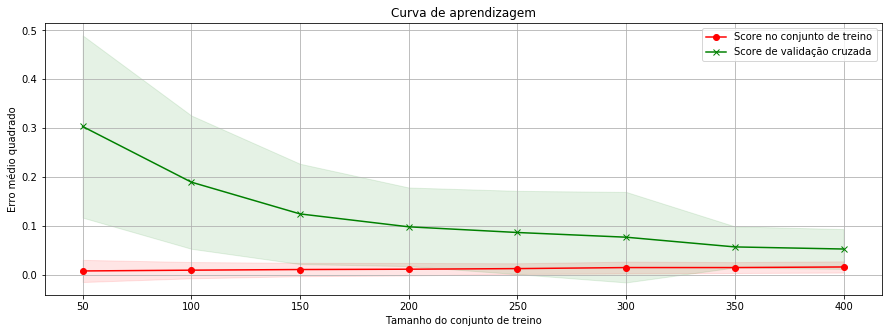

In [22]:
# Importando a funcao que permite tracar a curva de aprendizado
from sklearn.model_selection import learning_curve
# Importando a classe que permite fazer validacao cruzada com um conjunto de testes de tamanho fixo
from sklearn.model_selection import ShuffleSplit
# Importando a biblioteca que desenha os graficos
import matplotlib.pyplot as plt 

# Definindo o tamanho dos conjuntos de treinamento com relacao ao original
train_sizes=[50,100, 150,200, 250,300,350,400]

# Definindo o objeto que irá realizar a divisao do conjunto de treino para a validacao cruzada
# Usando 100 iteracoes para obter curvas mais suaves
# O conjunto de testes tem tamanho fixo 
cv = ShuffleSplit(n_splits=100, test_size=2000, random_state=0)

# Define o estimador que sera usado
estimator=regressor_sk

# Determina os scores de validacao cruzada para diferentes tamanhos de conjunto de treino
train_sizes, train_scores, test_scores = learning_curve(estimator, x_train, y_train, cv=cv, 
                                                        train_sizes=train_sizes, scoring="neg_mean_squared_error")

# Calculando a media e o desvio padrao dos scores de treino e testes
train_scores_mean = np.mean(-train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)

# Ajustando os parametros do grafico 
# Definindo o tamanho do grafico
plt.figure(figsize=(15,5))

# Definindo o titulo e a denominacao dos eixos do grafico
plt.title("Curva de aprendizagem")
plt.xlabel("Tamanho do conjunto de treino")
plt.ylabel("Erro médio quadrado")

# Ativa as linhas de grid (grade) para o auxiliar a visualizacao
plt.grid()

# Com os valores de media e desvio padrao previamente calculados, cria as curvas de score
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plota as curvas de score no grafico
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score CV de treino")
plt.plot(train_sizes, test_scores_mean, 'x-', color="g",
             label="Score CV de testes")

# Deixa a legenda no lugar mais adequado
plt.legend(loc="best")

### Exercício 3
Discuta com os colegas o motivo das duas curvas terem comportamentos tão distintos?

### Exercício 4
Faça a curva de aprendizagem para a rede do problema de classificação. Qual o comportamento das duas curvas? Você observa o mesmo problema exposto no item anterior? Por que?

Dica: Se lembre de alterar o parâmetro scoring.

## Bônus - Usando as funções do sklearn com o keras

### Implemente uma função que crie sua rede neural

In [6]:
# Importando a biblioteca Keras
import keras

# Importando a classe usada para inicializar a rede neural
from keras.models import Sequential

# Importando a classe usada para criar as camadas da rede
from keras.layers import Dense 

def rede_neural(hl):
    # Inicializando a rede neural
    rede = Sequential()
    
    # Criando a variável que inicializará os pesos
    init=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=0)

    # Criando a camada de entrada e a unica camada escondida da rede
    # Teremos hl neuronios na camada escondida
    rede.add(Dense(output_dim=hl,init=init,activation='relu', input_dim=6))
    
    # Criando a camada de saída da rede
    rede.add(Dense(output_dim=1,init=init,activation='linear'))
             
    # Compiling a rede neural
    rede.compile(optimizer='adam', loss='mean_squared_error')
             
    # Retornando a rede
    return rede
             

Using TensorFlow backend.


### Instancie um objeto da classe KerasRegressor (regressão) ou KerasClassifier (classificação)

In [32]:
# Importando a classe que possibilita a integracao entre as duas bibliotecas para problemas de regressao
from keras.wrappers.scikit_learn import KerasRegressor

# Criando um regressor compativel com a biblioteca sklearn
# E aqui que o numero de epocas e o batch_size deve ser definido
rede = KerasRegressor(build_fn=rede_neural, hl=100, epochs=100, batch_size=100)

### Agora a rede está pronta para usar as funções do sklearn !

### Exemplo - Grid search no keras 

In [34]:
# Importando a classe usada para fazer o grid search
from sklearn.model_selection import GridSearchCV

# Definindo os possiveis valores para o parametro hidden_layer_sizes
hl=[100,50,25]

# Criando um dicionario de parametros
params={'hl':hl}

# Criando um objeto grid search com o keras
regressor_gs = GridSearchCV(estimator=KerasRegressor(build_fn=rede_neural, epochs=100, batch_size=100),param_grid=params, cv=3, verbose=1, scoring='neg_mean_squared_error')

# Ajustando todas as possiveis redes ao conjunto de treino
# A rede com melhor score no conjunto de treino sera escolhida
# Observe que o metodo fit esta sendo usado da mesma forma que no sklearn
regressor_gs.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/100
5333/5333 [==============================] - 4s 835us/step - loss: 10.7185
Epoch 2/100
5333/5333 [==============================] - 1s 115us/step - loss: 1.9722
Epoch 3/100
5333/5333 [==============================] - 1s 113us/step - loss: 0.6515
Epoch 4/100
5333/5333 [==============================] - 1s 111us/step - loss: 0.4839
Epoch 5/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.4144
Epoch 6/100
5333/5333 [==============================] - 1s 106us/step - loss: 0.3682
Epoch 7/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.3395
Epoch 8/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.3211
Epoch 9/100
5333/5333 [==============================] - 1s 100us/step - loss: 0.3072
Epoch 10/100
5333/5333 [==============================] - 1s 104us/step - loss: 0.2951
Epoch 11/100
5333/5333 [==============================] - 1s 112us/step - loss:

5333/5333 [==============================] - 0s 84us/step - loss: 0.1156
Epoch 96/100
5333/5333 [==============================] - 1s 100us/step - loss: 0.1129
Epoch 97/100
5333/5333 [==============================] - 0s 74us/step - loss: 0.1129
Epoch 98/100
5333/5333 [==============================] - 0s 77us/step - loss: 0.1115
Epoch 99/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.1106
Epoch 100/100
5333/5333 [==============================] - 0s 90us/step - loss: 0.1125
Epoch 1/100
5333/5333 [==============================] - 4s 790us/step - loss: 10.3449
Epoch 2/100
5333/5333 [==============================] - 1s 101us/step - loss: 1.8263
Epoch 3/100
5333/5333 [==============================] - 1s 105us/step - loss: 0.6316
Epoch 4/100
5333/5333 [==============================] - 1s 113us/step - loss: 0.4773
Epoch 5/100
5333/5333 [==============================] - 1s 99us/step - loss: 0.4115
Epoch 6/100
5333/5333 [==============================] - 0s 83us

Epoch 90/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.1283
Epoch 91/100
5333/5333 [==============================] - 1s 108us/step - loss: 0.1260
Epoch 92/100
5333/5333 [==============================] - 1s 107us/step - loss: 0.1219
Epoch 93/100
5333/5333 [==============================] - 1s 107us/step - loss: 0.1210
Epoch 94/100
5333/5333 [==============================] - 1s 107us/step - loss: 0.1211
Epoch 95/100
5333/5333 [==============================] - 0s 93us/step - loss: 0.1202
Epoch 96/100
5333/5333 [==============================] - 1s 115us/step - loss: 0.1191
Epoch 97/100
5333/5333 [==============================] - 0s 81us/step - loss: 0.1189
Epoch 98/100
5333/5333 [==============================] - 1s 106us/step - loss: 0.1187
Epoch 99/100
5333/5333 [==============================] - 0s 88us/step - loss: 0.1173
Epoch 100/100
5333/5333 [==============================] - 1s 98us/step - loss: 0.1158
Epoch 1/100
5334/5334 [=======================

5333/5333 [==============================] - 1s 110us/step - loss: 0.1104
Epoch 79/100
5333/5333 [==============================] - 1s 105us/step - loss: 0.1112
Epoch 80/100
5333/5333 [==============================] - 1s 120us/step - loss: 0.1085 0s - los
Epoch 81/100
5333/5333 [==============================] - 1s 120us/step - loss: 0.1077
Epoch 82/100
5333/5333 [==============================] - 1s 118us/step - loss: 0.1095
Epoch 83/100
5333/5333 [==============================] - 1s 113us/step - loss: 0.1071
Epoch 84/100
5333/5333 [==============================] - 1s 117us/step - loss: 0.1062
Epoch 85/100
5333/5333 [==============================] - 1s 112us/step - loss: 0.1053
Epoch 86/100
5333/5333 [==============================] - 1s 123us/step - loss: 0.1056
Epoch 87/100
5333/5333 [==============================] - 1s 102us/step - loss: 0.1044
Epoch 88/100
5333/5333 [==============================] - 1s 126us/step - loss: 0.1053
Epoch 89/100
5333/5333 [=======================

5334/5334 [==============================] - 1s 120us/step - loss: 0.1267
Epoch 67/100
5334/5334 [==============================] - 1s 115us/step - loss: 0.1266
Epoch 68/100
5334/5334 [==============================] - 1s 114us/step - loss: 0.1238
Epoch 69/100
5334/5334 [==============================] - 1s 109us/step - loss: 0.1242
Epoch 70/100
5334/5334 [==============================] - 1s 105us/step - loss: 0.1238
Epoch 71/100
5334/5334 [==============================] - 1s 102us/step - loss: 0.1231
Epoch 72/100
5334/5334 [==============================] - 1s 103us/step - loss: 0.1208
Epoch 73/100
5334/5334 [==============================] - 1s 103us/step - loss: 0.1198
Epoch 74/100
5334/5334 [==============================] - 1s 109us/step - loss: 0.1200
Epoch 75/100
5334/5334 [==============================] - 1s 110us/step - loss: 0.1175
Epoch 76/100
5334/5334 [==============================] - 1s 105us/step - loss: 0.1179
Epoch 77/100
5334/5334 [==============================] 

Epoch 55/100
5333/5333 [==============================] - 1s 119us/step - loss: 0.1590
Epoch 56/100
5333/5333 [==============================] - 1s 123us/step - loss: 0.1549
Epoch 57/100
5333/5333 [==============================] - 1s 110us/step - loss: 0.1538
Epoch 58/100
5333/5333 [==============================] - 1s 109us/step - loss: 0.1526
Epoch 59/100
5333/5333 [==============================] - 1s 119us/step - loss: 0.1510
Epoch 60/100
5333/5333 [==============================] - 1s 115us/step - loss: 0.1493
Epoch 61/100
5333/5333 [==============================] - 1s 107us/step - loss: 0.1479
Epoch 62/100
5333/5333 [==============================] - 1s 111us/step - loss: 0.1470
Epoch 63/100
5333/5333 [==============================] - 1s 112us/step - loss: 0.1458
Epoch 64/100
5333/5333 [==============================] - 1s 106us/step - loss: 0.1451
Epoch 65/100
5333/5333 [==============================] - 1s 103us/step - loss: 0.1432
Epoch 66/100
5333/5333 [===================

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.4min finished


Epoch 1/100
8000/8000 [==============================] - 5s 654us/step - loss: 2.5952
Epoch 2/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.7581
Epoch 3/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.5185
Epoch 4/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.3852
Epoch 5/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.3232
Epoch 6/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.2936
Epoch 7/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.2794
Epoch 8/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.2667
Epoch 9/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.2560
Epoch 10/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.2454
Epoch 11/100
8000/8000 [==============================] - 1s 93us/step - loss: 0.2367
Epoch 12/100
8000/8000 [==============================]

GridSearchCV(cv=3, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f23e4b099e8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hl': [100, 50, 25]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [35]:
print(regressor_gs.best_params_)
print(-regressor_gs.best_score_)

{'hl': 50}
-0.09893763458004531
